In [236]:
from scenedetect import detect, ThresholdDetector, ContentDetector, SceneManager, open_video
import matplotlib.pyplot as plt
import time
import numpy as np
import face_recognition
import dlib

In [237]:
print(dlib.DLIB_USE_CUDA)

False


In [22]:
video_path = '/opt/ml/input/final-project-level3-cv-10/data/sample1_0-300s.mp4'

In [123]:
def get_scene_timelines(video_path):
    scene_list = detect(video_path, ContentDetector())
    timelines = [(scene[0].frame_num, scene[1].frame_num - 1) for scene in scene_list]
    return timelines

In [228]:
def get_blur_score(img_frame):
    img_gray = cv2.cvtColor(img_frame, cv2.COLOR_RGB2GRAY)
    score = cv2.Laplacian(img_gray, cv2.CV_64F).var()
    return score

In [125]:
scene_timelines = get_scene_timelines(video_path)

In [149]:
cap = cv2.VideoCapture(video_path)
frame_num = 0
last_frame = None

while True:
    success, cur_frame = cap.read()
    if last_frame is None:
        last_frame = cur_frame
        frame_num += 1
        continue
    
    num_pixels = cur_frame.shape[0] * cur_frame.shape[1]
    rgb_distance = np.abs(cur_frame - last_frame) / float(num_pixels)
    rgb_distance = rgb_distance.sum() / 3.0
    last_frame = cur_frame
    if rgb_distance > 100:
        print("Distance b/w {} and {}: {}".format(frame_num-1, frame_num, rgb_distance))
    
    if frame_num == 1500:
        break
    frame_num += 1

Distance b/w 62 and 63: 136.49993091724542
Distance b/w 121 and 122: 115.31632233796302
Distance b/w 159 and 160: 137.0607635271991
Distance b/w 202 and 203: 135.55679036458335
Distance b/w 230 and 231: 115.81864438657409
Distance b/w 260 and 261: 134.14546440972225
Distance b/w 330 and 331: 128.81347113715285
Distance b/w 431 and 432: 114.02561197916667
Distance b/w 511 and 512: 139.01356662326387
Distance b/w 671 and 672: 105.1437109374999
Distance b/w 707 and 708: 114.72517831307867
Distance b/w 761 and 762: 140.7836454716435
Distance b/w 811 and 812: 122.19088035300926
Distance b/w 885 and 886: 117.48406467013899
Distance b/w 950 and 951: 132.94737268518514
Distance b/w 974 and 975: 119.94706163194449
Distance b/w 1019 and 1020: 142.7175434027777
Distance b/w 1020 and 1021: 100.36923864293982
Distance b/w 1021 and 1022: 103.74844762731472
Distance b/w 1024 and 1025: 102.47279586226847
Distance b/w 1027 and 1028: 137.22205295138897
Distance b/w 1028 and 1029: 105.01811125578706
Dist

(720, 1280, 3)
1017.4344462204263
1
Average Blur Score: 1017.4344462204263


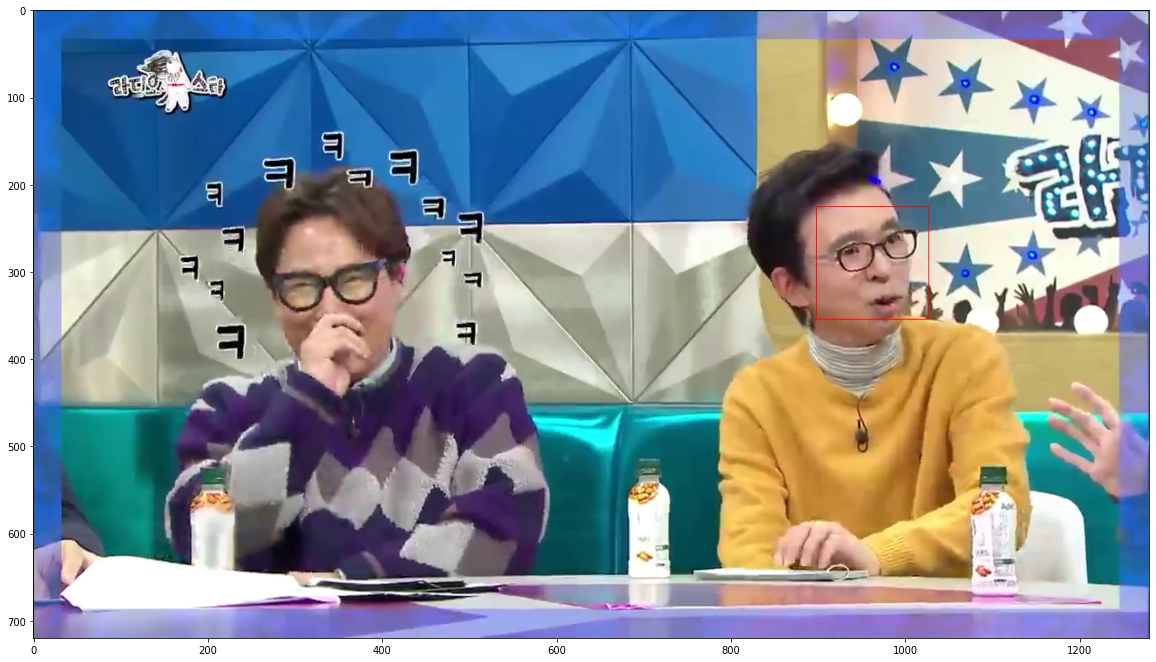

In [286]:
cap = cv2.VideoCapture(video_path) #video_name is the video being called

plt.figure(figsize=(20,20))

cnt = 0
while True:
    success, frame = cap.read()
    if cnt == 150:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        print(frame.shape)
        boxes = face_recognition.face_locations(frame)
        avg_blur_score = 0.
        face_cnt = 0
        for box in boxes:
            face_cnt += 1
            ymin, xmax, ymax, xmin = box
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (255, 0, 0))
            face_cropped = frame[ymin:ymax, xmin:xmax, :]
            blur_score = get_blur_score(face_cropped)
            avg_blur_score += blur_score
            print(blur_score)
            
        print(face_cnt)
        avg_blur_score /= face_cnt
        print("Average Blur Score:", avg_blur_score)
        
        
        plt.imshow(frame)
        break
    cnt += 1

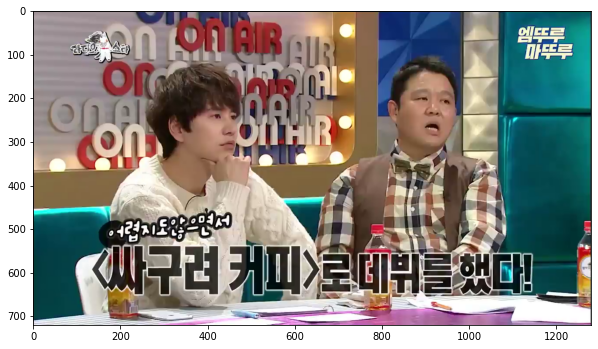

In [283]:
cap = cv2.VideoCapture(video_path) #video_name is the video being called

plt.figure(figsize=(10,10))

frame_idx = 0
timeline_idx = 0
while True:
    success, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if frame_idx == 2650:
        plt.imshow(frame)
        break
    frame_idx += 1

In [277]:
cap = cv2.VideoCapture(video_path) #video_name is the video being called

plt.figure(figsize=(10,10))

frame_idx = 0
timeline_idx = 0
while True:
    success, frame = cap.read()
    blur_score = get_blur_score(frame)
    if blur_score > 1000:
        print(frame_idx)
    frame_idx += 1

1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2649
2650


KeyboardInterrupt: 

<Figure size 720x720 with 0 Axes>